## 필수과제1 (타이타닉데이터셋)
- VarianceThreshold -타이타닉 데이터 feature_selection
    - 임계값 기준을 몇으로 했는지?
    - 그 기준의 이유
    - 어떤 식으로 찾았는지!
- 어떤 피처가 선택이 되었나?

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold

df1 = sns.load_dataset('titanic')
df1.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [59]:
df1.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [60]:
df1['age'].fillna(df1['age'].median(), inplace=True)
df1['embark_town'].fillna(df1['embark_town'].mode()[0], inplace=True)
df1['fare'].fillna(df1['fare'].median(), inplace=True)

df1.isna().sum()

C:\Users\dsm53\AppData\Local\Temp\ipykernel_36736\1656857683.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['age'].fillna(df1['age'].median(), inplace=True)
C:\Users\dsm53\AppData\Local\Temp\ipykernel_36736\1656857683.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64

In [61]:
x1 = df1[['age','sibsp','parch', 'fare', 'pclass']]

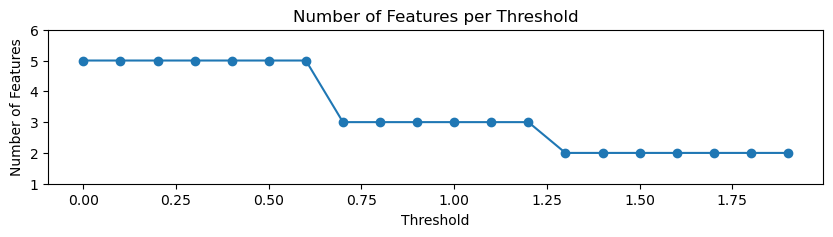

Features_Full : Index(['age', 'sibsp', 'parch', 'fare', 'pclass'], dtype='object')
Features_Selected : Index(['age', 'fare'], dtype='object')


In [118]:
thresholds = np.arange(0, 2, 0.1)
num_features = []
selected_feature_names = {}

for threshold in thresholds:
    selector = VarianceThreshold(threshold=threshold)
    x1_high_variance = selector.fit_transform(x1)
    
    selected_features = x1.columns[selector.get_support()]
    selected_feature_names[threshold] = selected_features.tolist()
    num_features.append(len(selected_features))

plt.figure(figsize=(10,2))
plt.plot(thresholds, num_features, marker='o')
plt.title('Number of Features per Threshold')
plt.ylim(1,6)
plt.xlabel('Threshold')
plt.ylabel('Number of Features')
plt.show()

print(f"Features_Full : {x1.columns}")
print(f"Features_Selected : {selected_features}")


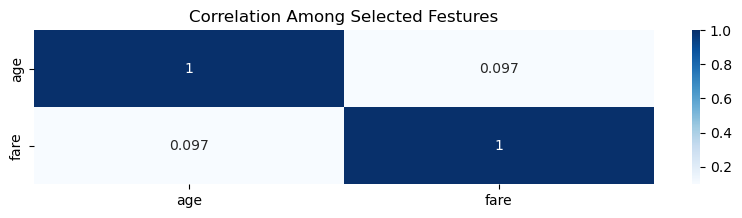

In [119]:
x1_selected = pd.DataFrame(x1_high_variance, columns = selected_features)
x1_corr = x1_selected.corr()

plt.figure(figsize=(10,2))
sns.heatmap(x1_corr, annot=True, cmap='Blues')
plt.title('Correlation Among Selected Festures')
plt.show()